In [17]:
import sympy as sy
sy.init_printing()  
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

# <font face="gotham" color="purple"> Similarity </font>

If $A = PBP^{-1}$, we say $A$ is _similar_ to $B$, decomposing $A$ into $PBP^{-1}$ is also called a _similarity transformation_, $P$ is an invertable matrix.

If $n\times n$ matrices $A$ and $B$ are similar, they have the _same eigenvalues_.

Here are some reasons that we need similarity transformation:
1. Invariant Properties: Similar matrices share many important properties, such as eigenvalues, determinant, trace, and rank. This invariance makes similarity transformations useful for simplifying problems without changing their fundamental characteristics.

2. Changing Basis: Similarity transformations can be interpreted as changing the basis in which the linear transformation represented by the matrix is expressed. This change of basis can make the problem easier to understand or solve.

3. Applications: Similarity transformations are widely used in various applications, including diagonalization, canonical forms, and simplifying differential equations.

The _diagnoalization_, which we will explain below,  is a special case of similarity transformation.

# <font face="gotham" color="purple"> Diagonalizable Matrix and Special Decompositon</font>

Let $A$ be an $n\times n$ matrix. If there exists an $n\times n$ invertible matrix $P$ and a diagonal matrix $D$, such that

$$
A=PDP^{-1}
$$

then matrix $A$ is called a _diagonalizable matrix_.

And further, the columns of $P$ are linearly independent eigenvectors of $A$, and its corresponding eigenvalues are on the principal diagonal of $D$. In other words, $A$ is diagonalizable if and only if the dimension of eigenspace basis is $n$.

Let's show why this equation holds. Define $P$ and $D$



$$
P = \left[\begin{array}{llll}
{v}_{1} & {v}_{2} & \cdots & {v}_{n}
\end{array}\right]\\
$$

$$
D = \left[\begin{array}{cccc}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & & \vdots \\
0 & 0 & \cdots & \lambda_{n}
\end{array}\right]
$$

where $v_i, i \in (1, 2, ...n)$ is an eigenvector of $A$, $\lambda_i, i \in (1, 2, ...n)$ is an eigenvalue of $A$.

$$
AP = A\left[\begin{array}{llll}
{v}_{1} & {v}_{2} & \cdots & {v}_{n}
\end{array}\right]=\left[\begin{array}{llll}
A {v}_{1} & A {v}_{2} & \cdots & A {v}_{n}
\end{array}\right]
$$

$$P D=\left[\begin{array}{llll}
{v}_{1} & {v}_{2} & \cdots & {v}_{n}
\end{array}\right]\left[\begin{array}{cccc}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & & \vdots \\
0 & 0 & \cdots & \lambda_{n}
\end{array}\right]=\left[\begin{array}{lllll}
\lambda_{1} {v}_{1} & \lambda_{2} {v}_{2} & \cdots & \lambda_{n} {v}_{n}
\end{array}\right]$$

We know that $A{v}_i = \lambda_i{v}_i$, i.e.

$$
AP = PD
$$

Since $P$ has all independent eigenvectors, then

$$
A = PDP^{-1}
$$

Strictly speaking, if $A$ is symmetric, i.e. $A=A^T$, the procedure above called _Spectral decomposition_, the similar matrix $D$ holds all the eigenvalues on its diagonal. And $P$ is orthogonal matrix, which means any of of its two columns are perpendicular. Therefore it could be rewritten as 
$$
A = PDP^{T}
$$

We can show why all eigenvectors are orthogonal to each other:
Set up two equations
$$
A \mathbf{v}_1=\lambda_1 \mathbf{v}_1\\
A \mathbf{v}_2=\lambda_2 \mathbf{v}_2
$$
Take the transpose of the first equation and multiply by $\mathbf{v}_2$ :
$$
\mathbf{v}_1^T A^T \mathbf{v}_2=\lambda_1 \mathbf{v}_1^T \mathbf{v}_2
$$
Since $A$ is symmetric $\left(A=A^T\right)$ :
$$
\mathbf{v}_1^T A \mathbf{v}_2=\lambda_1 \mathbf{v}_1^T \mathbf{v}_2
$$

Substitute $A \mathbf{v}_2=\lambda_2 \mathbf{v}_2$ into the equation:
$$
\mathbf{v}_1^T\left(\lambda_2 \mathbf{v}_2\right)=\lambda_1 \mathbf{v}_1^T \mathbf{v}_2
$$
Simplify to get:
$$
\lambda_2 \mathbf{v}_1^T \mathbf{v}_2=\lambda_1 \mathbf{v}_1^T \mathbf{v}_2
$$

Since $\lambda_1 \neq \lambda_2$ :
$$
\left(\lambda_2-\lambda_1\right) \mathbf{v}_1^T \mathbf{v}_2=0
$$
This implies that $\mathbf{v}_1^T \mathbf{v}_2=0$, meaning $\mathbf{v}_1$ and $\mathbf{v}_2$ are orthogonal.


Correlation/covariance matrix is a good example, which is symmetric and square, its all eigenvalues are real.

# <font face="gotham" color="purple"> Spectral Decomposition Visualization</font>

Let's visualize spectral decomposition, $P$ and $P^T$ are for rotation because they orthogonal, and $D$ are for scaling because it's diagonal.

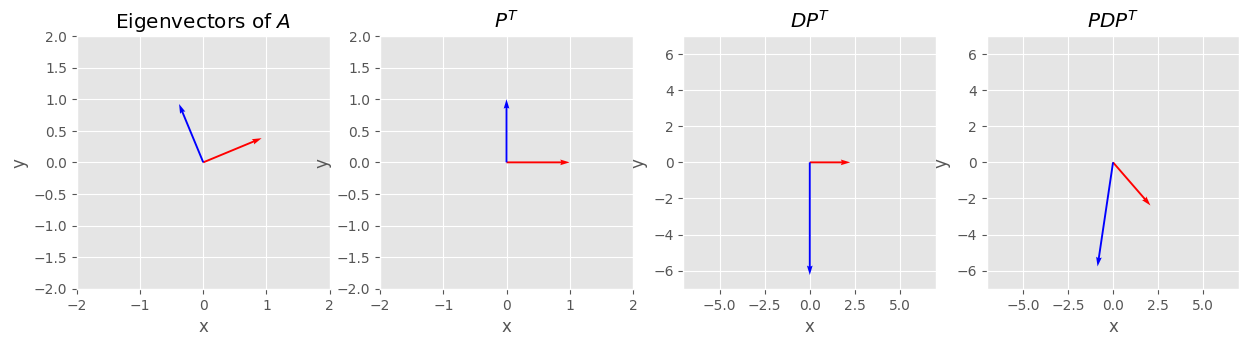

In [18]:

# Define matrix A
A = np.array([[1, 3], [3, -5]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Plot eigenvectors
fig, ax = plt.subplots(figsize=(15, 4), nrows=1, ncols=4)
for i in range(2):
    ax[0].quiver(0, 0, eigenvectors[:,i][0], eigenvectors[:,i][1], angles='xy', 
                 scale_units='xy', scale=1, color=['r','b'][i])
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(-2, 2)
ax[0].set_title('Eigenvectors of $A$')

for i in range(4):
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_aspect('equal')

ax[1].quiver(0, 0, 1, 0, angles='xy', 
             scale_units='xy', scale=1, color=['r'])
ax[1].quiver(0, 0, 0, 1, angles='xy', 
             scale_units='xy', scale=1, color=['b'])
ax[1].set_xlim(-2, 2)
ax[1].set_ylim(-2, 2)
ax[1].set_title('$P^T$')


ax[2].quiver(0, 0, eigenvalues[0], 0, angles='xy', 
             scale_units='xy', scale=1, color=['r'])
ax[2].quiver(0, 0, 0, eigenvalues[1], angles='xy', 
             scale_units='xy', scale=1, color=['b'])
ax[2].set_xlim(-7, 7)
ax[2].set_ylim(-7, 7)
ax[2].set_title('$DP^T$')

temp = np.array([[eigenvalues[0], 0],
                 [0, eigenvalues[1]]])
temp1 = temp@eigenvectors

ax[3].quiver(0, 0, temp1[:,0][0], temp1[:,0][1], angles='xy', 
             scale_units='xy', scale=1, color=['r'])
ax[3].quiver(0, 0, temp1[:,1][0], temp1[:,1][1], angles='xy', 
             scale_units='xy', scale=1, color=['b'])
ax[3].set_xlim(-7, 7)
ax[3].set_ylim(-7, 7)
ax[3].set_title('$PDP^T$')

plt.show()

# <font face="gotham" color="purple"> Diagonalizing a Matrix</font>

Consider a matrix

$$A=\left[\begin{array}{rrr}
1 & 3 & 3 \\
-3 & -5 & -3 \\
3 & 3 & 1
\end{array}\right]$$

We seek to diagonalize the matrix $A$.

Following these steps:

1. Compute the eigenvalues of $A$
2. Compute the eigenvectors of $A$
3. Construct $P$.
4. Construct $D$ from the corresponding columns of $P$.

In [21]:
A = sy.Matrix([[1,3,3], [-3, -5, -3], [3,3,1]])
eig = A.eigenvects()
eig

⎡⎛       ⎡⎡-1⎤  ⎡-1⎤⎤⎞  ⎛      ⎡⎡1 ⎤⎤⎞⎤
⎢⎜       ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎢⎜-2, 2, ⎢⎢1 ⎥, ⎢0 ⎥⎥⎟, ⎜1, 1, ⎢⎢-1⎥⎥⎟⎥
⎢⎜       ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣0 ⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠⎦

Reminder the return value takes the form ```[(eigenval, multiplicity, eigenspace), ...]```.

Construct $P$

In [22]:
P = sy.zeros(3, 3)
P[:, 0] = eig[0][2][0]
P[:, 1] = eig[0][2][1]
P[:, 2] = eig[1][2][0]
P

⎡-1  -1  1 ⎤
⎢          ⎥
⎢1   0   -1⎥
⎢          ⎥
⎣0   1   1 ⎦

Construct $D$

In [23]:
D = sy.diag(eig[0][0], eig[0][0], eig[1][0])
D

⎡-2  0   0⎤
⎢         ⎥
⎢0   -2  0⎥
⎢         ⎥
⎣0   0   1⎦

We can verify if $PDP^{-1}=A$ holds:

In [24]:
P * D * P.inv() == A 

True

Of course we don't need to go through this process seperately. There is ```diagonalize``` method in SymPy.

In [25]:
P, D = A.diagonalize()

In [ ]:
P

⎡-1  -1  1 ⎤
⎢          ⎥
⎢1   0   -1⎥
⎢          ⎥
⎣0   1   1 ⎦

In [ ]:
D

⎡-2  0   0⎤
⎢         ⎥
⎢0   -2  0⎥
⎢         ⎥
⎣0   0   1⎦

We obtain the same results as previous separate steps.

Sometimes we just want to test if a matrix is diagonalizable, then use ```is_diagonalizable``` in SymPy.

In [26]:
A.is_diagonalizable()

True

If $A$ is symmetric, all of its eigenvectors are orthogonal. 

$$
Av_1 = \lambda_1v_1 \quad \text{and} \quad Av_2 = \lambda_2v_2
$$

$$
v_2 \cdot Av_1 = \lambda_1v_1 \cdot v_2\\
v_1 \cdot Av_2 = \lambda_2v_2 \cdot v_1
$$

$$
v_1 \cdot Av_2 = v_1 \cdot A^Tv_2 = v_1 \cdot \lambda_2v_2 = \lambda_2v_1 \cdot v_2\\
v_2 \cdot Av_1 = v_2 \cdot A^Tv_1 = v_2 \cdot \lambda_1v_1 = \lambda_1v_2 \cdot v_1
$$

#  <font face="gotham" color="purple"> How Diagonalization Simplifies the Solution Process </font>
Original System:
The original system of differential equations is coupled, meaning that each ed involves multiple variables. For example:
$$
\frac{d \mathbf{x}}{d t}=A \mathbf{x}
$$
where $A$ is a matrix, and $\mathbf{x}$ is a vector of variables.

By finding the eigenvalues and eigenvectors of the matrix $A$, we can decomp into $P D P^{-1}$, where $D$ is a diagonal matrix of eigenvalues and $P$ is the matri eigenvectors:
$$
A=P D P^{-1}
$$
 We introduce a change of variables using the eigenvector matrix $P$ :
$$
\mathbf{x}=P \mathbf{y}
$$

Substituting this into the original differential equation gives:

$$
\frac{d(P \mathbf{y})}{d t}=A(P \mathbf{y})
$$

Simplifying, we get:
$$
P \frac{d \mathbf{y}}{d t}=P D P^{-1}(P \mathbf{y})
$$

Since $P^{-1} P=I$ :
$$
P \frac{d \mathbf{y}}{d t}=P D \mathbf{y}
$$

Multiplying both sides by $P^{-1}$ :
$$
\frac{d \mathbf{y}}{d t}=D \mathbf{y}
$$
The transformed system $\frac{d \mathbf{y}}{d t}=D \mathbf{y}$ is now decoupled because $D$ is a diagonal matrix. This means that each differential equation in the system involves only a single variable $y_i$ and can be solved independently:

$$
\frac{d y_i}{d t}=\lambda_i y_i
$$
where $\lambda_i$ are the eigenvalues of $A$.
 Solving the Decoupled System:
 The decoupled differential equations are simple first-order linear differential equations, which have straightforward solutions:
$$
y_i(t)=c_i e^{\lambda_i t}
$$
where $c_i$ are constants determined by the initial conditions.
 Finally, we transform the solution back to the original variables using the eigenvector matrix $P$ :
$$
\mathbf{x}=P \mathbf{y}
$$

This gives us the solution to the original system.